In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from urllib.parse import urlencode

import matplotlib.pyplot as plt
import seaborn as sns

# Выгрузка данных

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'  

In [3]:
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
customers = pd.read_csv(requests.get(final_url).json()['href'])

In [4]:
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
orders = pd.read_csv(requests.get(final_url).json()['href'], 
                     parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                                  'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [5]:
public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
order_items = pd.read_csv(requests.get(final_url).json()['href'],  parse_dates=['shipping_limit_date'])

# Предварительный просмотр данных 

1.Таблица с уникальными идентификаторами пользователей

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
customers.duplicated().sum()

0

2.Товарные позиции, входящие в заказы

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [11]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders.duplicated().sum()

0

3.Таблица заказов

In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [16]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
order_items.duplicated().sum()

0

In [1]:
#Даты в orders и order_items представлены в некорректном формате, поэтому 
#возвращаемся на шаг назад, чтобы распарсить даты и снова выгрузить.
#После этого снова проверяем данные, чтобы убедиться, что колонки дат в формате datetime.

# 1. Сколько пользователей, которые совершили покупку только один раз?


Будем считать покупкой тот случай, когда клиент оплатил заказ и не отменил его.

In [21]:
#мёрджим таблицу c информацией о пользователях и таблицу с позициями, входящими в заказы по колонке "customer_id".
customers_orders = pd.merge(customers, orders, on='customer_id', how='inner') 
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [22]:
#фильтруем заказы, оставляя только те, которые считаем покупкой, группируем по уникальному id пользователя,
#считаем количество заказов и сразу же фильтруем, оставляя колонки с одним заказом. Считаем такие колонки.
only_one_purchase = customers_orders.query('order_approved_at != "NaT" and order_status != "canceled"') \
    .groupby('customer_unique_id').order_status.count().reset_index() \
    .query('order_status==1').count()

In [23]:
#получаем 92621 клиентов, совершивших только один заказ.
only_one_purchase

customer_unique_id    92621
order_status          92621
dtype: int64

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [8]:
#посмотрим на все статусы заказов.
orders.value_counts('order_status')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
dtype: int64

In [9]:
#сохраняем таблицу orders в новую переменную, чтобы не менять исходные данные.
df_orders = orders
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [10]:
#переводим время создания заказа(order_purchase_timestamp) в формат месяца и сохраняем в отдельную колонку.
df_orders["month"] = pd.to_datetime(df_orders["order_purchase_timestamp"]).dt.strftime('%m')
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
month                                    object
dtype: object

In [11]:
#Будем считать недоставленными те заказы, статус которых не 'delivered' +
# + у которых отсутствует дата доставки (order_delivered_customer_date = NaN).
not_delivered = df_orders[orders.order_delivered_customer_date.isna()].query("order_status != 'delivered'")
not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,01


In [13]:
#После группировки по нужным колонкам, сначала просто считаем количество заказов, 
#а после уже среднее по месяцам, сортируем по месяцам. Детализация по статусу.
not_delivered \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "count"}) \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "mean"}) \
    .round() \
    .sort_values("month") \
    .rename(columns={'order_id': 'num_of_orders'})

,month,order_status,num_of_orders
0,01,canceled,37
1,01,invoiced,27
2,01,processing,38
3,01,shipped,90
4,01,unavailable,58
...,...,...,...
59,12,canceled,11
60,12,created,2
61,12,invoiced,13
62,12,processing,35


In [28]:
#После группировки по нужным колонкам, сначала просто считаем количество заказов, 
#а после уже среднее по месяцам, сортируем по месяцам. Без детализации по статусу.
not_delivered \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "count"}) \
    .groupby('month', as_index=False) \
    .agg({"order_id": "mean"}) \
    .round() \
    .sort_values("month") \
    .rename(columns={'order_id': 'num_of_orders'})

,month,num_of_orders
0,01,50.0
1,02,43.0
2,03,69.0
3,04,40.0
4,05,56.0
5,06,36.0
6,07,57.0
7,08,60.0
8,09,31.0
9,10,42.0


Немного другое решение:

In [14]:
orders_df = orders
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,02


In [15]:
#иначе выражаем месяц
orders_df["month"] = pd.to_datetime(orders_df["order_purchase_timestamp"]).dt.strftime('%Y-%m')
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
month                                    object
dtype: object

In [16]:
#дальше выполняем те же действия
not_delivered = orders_df[orders.order_delivered_customer_date.isna()].query("order_status != 'delivered'")

In [17]:
#детализация по статусу.
not_delivered \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "count"}) \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "mean"}) \
    .round() \
    .sort_values("month") \
    .rename(columns={'order_id': 'num_of_orders'})

,month,order_status,num_of_orders
0,2016-09,canceled,2
1,2016-09,shipped,1
2,2016-10,canceled,19
3,2016-10,invoiced,18
4,2016-10,processing,2
...,...,...,...
108,2018-08,shipped,47
109,2018-08,unavailable,7
110,2018-09,canceled,15
111,2018-09,shipped,1


In [32]:
#получаем среднее не просто по месяцам, а по месяцам каждого года. Без детализации по статусу.
not_delivered \
    .groupby(["month", "order_status"], as_index=False) \
    .agg({"order_id": "count"}) \
    .groupby('month', as_index=False) \
    .agg({"order_id": "mean"}) \
    .round() \
    .sort_values("month") \
    .rename(columns={'order_id': 'num_of_orders'})

,month,num_of_orders
0,2016-09,2.0
1,2016-10,11.0
2,2017-01,10.0
3,2017-02,21.0
4,2017-03,27.0
5,2017-04,17.0
6,2017-05,31.0
7,2017-06,22.0
8,2017-07,31.0
9,2017-08,28.0


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.


In [33]:
#Объединяем df с описанием заказов и df с описанием товарных позиций.
purchase_by_day = pd.merge(orders, order_items, on='order_id', how='inner')
purchase_by_day.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [34]:
purchase_by_day.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
month                                    object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

In [35]:
#Создаём колонку с названиями дней недели на основе времени подтверждения оплаты заказа.
purchase_by_day['week_day'] = purchase_by_day.order_approved_at.dt.day_name()
purchase_by_day['week_day']

0            Monday
1          Thursday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
112645      Tuesday
112646       Sunday
112647       Monday
112648       Monday
112649       Friday
Name: week_day, Length: 112650, dtype: object

In [36]:
#фильтруем заказы, оставляя только те, которые считаем покупкой.
purchase_by_day_ = purchase_by_day.query('order_approved_at != "NaT" and order_status != "canceled"') 
purchase_by_day_.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,week_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [37]:
#сгруппироовав таблицу по колонкам 'product_id' и 'week_day', считаем количество покупок,
#сортируем по убыванию и переимновываем колонку.
purchase_by_day_ = purchase_by_day_.groupby(['product_id', 'week_day'], as_index=False) \
    .agg({'customer_id':'count'}) \
    .sort_values('customer_id', ascending=False) \
    .rename(columns={'customer_id': 'num_of_orders'}) \

purchase_by_day_

,product_id,week_day,num_of_orders
40854,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20038,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
40849,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
40855,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
15846,422879e10f46682990de24d770e7f83d,Tuesday,89
...,...,...,...
23854,63f4d40c05db6ade462cecef857eec34,Monday,1
23856,63f4d40c05db6ade462cecef857eec34,Wednesday,1
23857,63f52009dc3ddb733394e80183aed0f0,Saturday,1
23858,63f7a4366da7b3a3cb5bd2336ca15f7e,Friday,1


In [38]:
#оставляем только максимальные значения.
most_frequently_purchased_product = purchase_by_day_.loc[purchase_by_day_.groupby(['product_id'])['num_of_orders'].idxmax()]
most_frequently_purchased_product

,product_id,week_day,num_of_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
60791,fff6177642830a9a94a0f2cba5e476d1,Monday,1
60793,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
60794,fff9553ac224cec9d15d49f5a263411f,Saturday,1
60797,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3


Text(0, 0.5, 'Кол-во заказов')

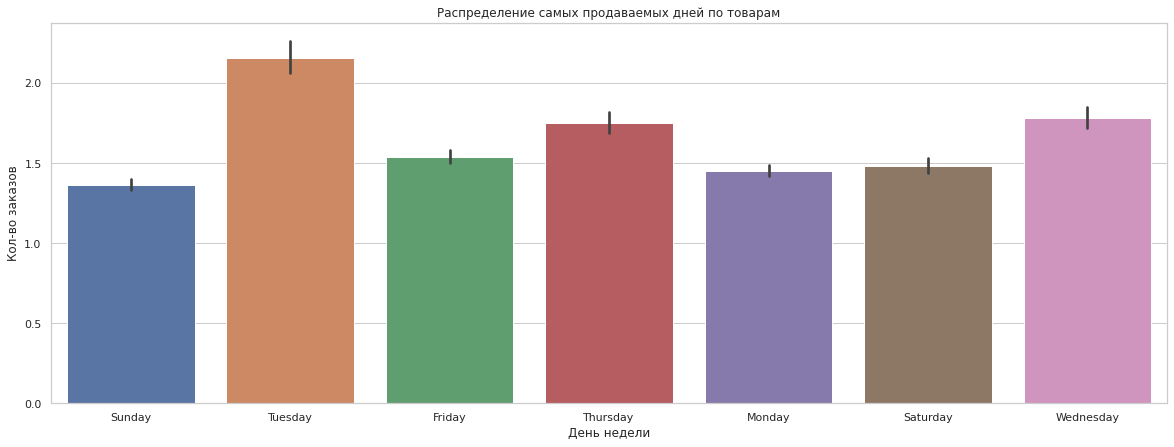

In [39]:
#визуализируем
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

sns.barplot(x='week_day', y='num_of_orders', data=most_frequently_purchased_product)
plt.title('Распределение самых продаваемых дней по товарам')
plt.xlabel('День недели')
plt.ylabel('Кол-во заказов')

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [18]:
#объединяем таблицы с данными о клиентах и заказах.
orders_by_week = customers.merge(orders, on="customer_id")
orders_by_week.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07


In [19]:
#фильтруем таблицу, оставляя только те строки, которые соответствуют покупке.
orders_by_week = orders_by_week.query('order_approved_at != "NaT" and order_status != "canceled"') 

In [20]:
#проверяем первую и последнюю даты заказов.
orders_by_week.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [21]:
orders_by_week.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

In [22]:
#для большей точности оставим только полные месяцы.
orders_by_week = orders_by_week.query('order_purchase_timestamp >= "2016-10-01" & order_purchase_timestamp <= "2018-08-31"')

In [23]:
#cоздаём отдельную колонку с месяцем создания заказа.
orders_by_week['month'] = orders_by_week.order_purchase_timestamp.dt.strftime('%Y-%m')

In [24]:
#cоздаём отдельную колонку c количеством недель в каждом месяце.
orders_by_week['weeks'] = (pd.to_datetime(orders_by_week.month).dt.daysinmonth / 7).round(2)

In [25]:
#группируемся по колонкам 'customer_unique_id', 'month' и 'weeks', считаем количество заказов,
#сортируем по возрастанию месяца.
orders_by_week = orders_by_week.groupby(['customer_unique_id', 'month', 'weeks']) \
  .agg({'order_id': 'count'}).sort_values('month') \
  .reset_index().rename(columns={'order_id': 'num_of_orders'})
orders_by_week

,customer_unique_id,month,weeks,num_of_orders
0,6259b1f4da26c67879164ebce6333481,2016-10,4.43,1
1,6b681e2738264eb39f1da19f82919630,2016-10,4.43,1
2,aa6ea6f8307ee33b985192329cd8c79c,2016-10,4.43,1
3,7af2db50b8a1a1c7fdf77acb033ba6b0,2016-10,4.43,1
4,cdf2b280dbabe2b047ba03f1886265e6,2016-10,4.43,1
...,...,...,...,...
97433,180ce6c4e74b5e16c027958bf2241881,2018-08,4.43,1
97434,63ebabf91afda8d43e0f6412fcfe6bf1,2018-08,4.43,1
97435,9882ddc80cf0ed9be3b9a7dada8e86f0,2018-08,4.43,1
97436,ac24803bdce566fa275258a3a91ad3a9,2018-08,4.43,1


In [26]:
#делим получченное количество заказов на количество недель по месяцам.
orders_by_week['num_orders_by_week'] = orders_by_week.num_of_orders / orders_by_week.weeks
orders_by_week

,customer_unique_id,month,weeks,num_of_orders,num_orders_by_week
0,6259b1f4da26c67879164ebce6333481,2016-10,4.43,1,0.225734
1,6b681e2738264eb39f1da19f82919630,2016-10,4.43,1,0.225734
2,aa6ea6f8307ee33b985192329cd8c79c,2016-10,4.43,1,0.225734
3,7af2db50b8a1a1c7fdf77acb033ba6b0,2016-10,4.43,1,0.225734
4,cdf2b280dbabe2b047ba03f1886265e6,2016-10,4.43,1,0.225734
...,...,...,...,...,...
97433,180ce6c4e74b5e16c027958bf2241881,2018-08,4.43,1,0.225734
97434,63ebabf91afda8d43e0f6412fcfe6bf1,2018-08,4.43,1,0.225734
97435,9882ddc80cf0ed9be3b9a7dada8e86f0,2018-08,4.43,1,0.225734
97436,ac24803bdce566fa275258a3a91ad3a9,2018-08,4.43,1,0.225734


In [27]:
#наконец, считаем среднее количество заказов.
avg_orders_by_week = orders_by_week.groupby(['customer_unique_id','month'], as_index=False) \
    .agg({'num_orders_by_week': 'mean'}).sort_values('month') \
    .rename(columns={'num_orders_by_week':'avg_num_orders_by_week'})

avg_orders_by_week

,customer_unique_id,month,avg_num_orders_by_week
37573,6259b1f4da26c67879164ebce6333481,2016-10,0.225734
41006,6b681e2738264eb39f1da19f82919630,2016-10,0.225734
64976,aa6ea6f8307ee33b985192329cd8c79c,2016-10,0.225734
46879,7af2db50b8a1a1c7fdf77acb033ba6b0,2016-10,0.225734
78458,cdf2b280dbabe2b047ba03f1886265e6,2016-10,0.225734
...,...,...,...
9233,180ce6c4e74b5e16c027958bf2241881,2018-08,0.225734
38146,63ebabf91afda8d43e0f6412fcfe6bf1,2018-08,0.225734
58103,9882ddc80cf0ed9be3b9a7dada8e86f0,2018-08,0.225734
65605,ac24803bdce566fa275258a3a91ad3a9,2018-08,0.225734


Text(0, 0.5, 'Среднее заказов на пользователя в неделю')

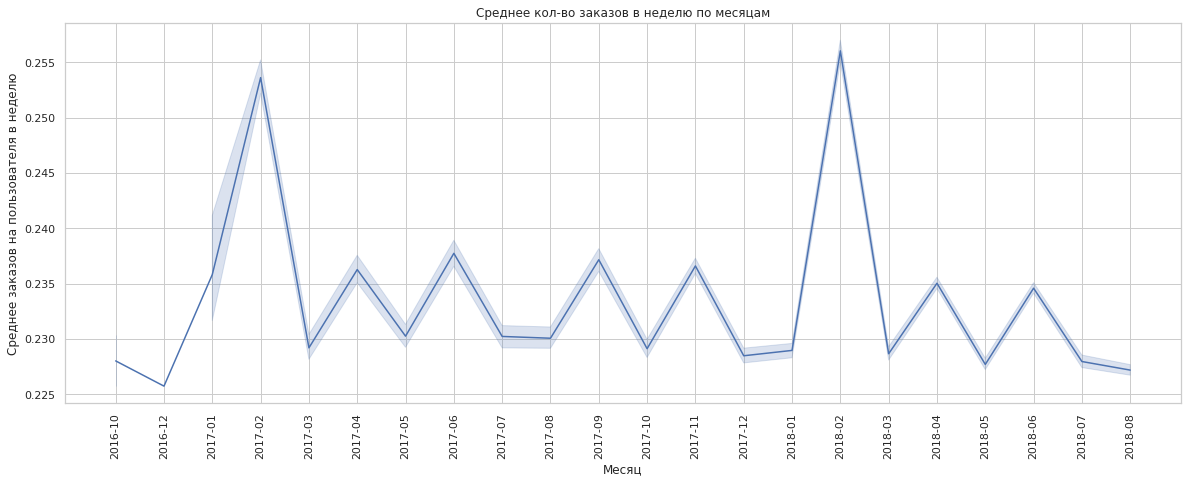

In [28]:
#визуализируем
#на графике видны два пика, оба приходятся на февраль (2017 и 2018)
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

sns.lineplot(x='month', y='avg_num_orders_by_week', data=avg_orders_by_week)
plt.xticks(rotation=90)
plt.title('Среднее кол-во заказов в неделю по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее заказов на пользователя в неделю')

# 5. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. 

In [40]:
#проверяем начальную и конечную даты.
orders.order_approved_at.min()

Timestamp('2016-09-15 12:16:38')

In [41]:
orders.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

In [42]:
#хотя данные с 2016 по 2018 годы, но полный год только 2017-й.
#по условию нам нужно провести когортный анализ с января по декабрь, 
#значит берём период с 2017-01-01 по 2017-12-31, но для оценки последней когорты включим ещё три месяца из 2018-го.

In [43]:
#мёрджим данные о клиентах и о заказах.
df_full =  customers.merge(orders, on='customer_id')

In [44]:
#фильтруем данные, оставляя нужный нам период и только те заказы, которые считаем покупкой.
df_full = df_full.query('order_purchase_timestamp >= "2017-01-01" & order_purchase_timestamp <= "2018-03-31"')
df_full = df_full.query('order_approved_at != "NaT" and order_status != "canceled"') 

In [45]:
#на основе времени создания заказа создаём колонку с месяцем заказа в формате '%Y-%m'. 
df_full['order_month'] = df_full.order_purchase_timestamp.dt.strftime('%Y-%m')
df_full.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,2017-09,2017-09
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,2018-02,2018-02


In [46]:
#находим первые заказы каждого пользователя.
first_order = df_full.groupby('customer_unique_id', as_index=False) \
  .agg({'order_month': 'min'}).sort_values('customer_unique_id') \
  .rename(columns={'order_month': 'first_order_month'})

first_order.head()

,customer_unique_id,first_order_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


In [47]:
#создаем таблицу с данными о кленте, заказе, месяце заказа и первом заказе.
cohorts = df_full[['customer_unique_id', 'order_id', 'order_month']].merge(first_order, on='customer_unique_id')
cohorts.head()

,customer_unique_id,order_id,order_month,first_order_month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01,2018-01
2,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03,2018-03
3,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09,2017-09
4,4c93744516667ad3b8f1fb645a3116a4,98b737f8bd00d73d9f61f7344aadf717,2017-10,2017-09


In [48]:
#считаем количество уникальных пользователей.
cohorts = cohorts.groupby(['first_order_month', 'order_month'], as_index = False) \
  .agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'num_of_users'})
cohorts.head()

,first_order_month,order_month,num_of_users
0,2017-01,2017-01,761
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [61]:
#создаём функцию, которая нумерует месяцы по диапазону окна в когорте
def cohort_month(df):
    df['month'] = np.arange(len(df))
    return df

cohorts = cohorts.groupby('first_order_month').apply(cohort_month)

cohorts.tail()

,first_order_month,order_month,num_of_users,month
114,2018-01,2018-02,23,1
115,2018-01,2018-03,24,2
116,2018-02,2018-02,6382,0
117,2018-02,2018-03,21,1
118,2018-03,2018-03,6789,0


In [62]:
#заменяем индексы
cohorts.reset_index(inplace=True)
cohorts.set_index(['first_order_month', 'month'], inplace=True)

cohorts.head()

index order_month  num_of_users
first_order_month month                                 
2017-01           0          0     2017-01           761
                  1          1     2017-02             3
                  2          2     2017-03             2
                  3          3     2017-04             1
                  4          4     2017-05             3

In [63]:
#сохраняем размеры когорт
cohort_size = cohorts['num_of_users'].groupby('first_order_month').first()

cohort_size.head()

first_order_month
2017-01     761
2017-02    1723
2017-03    2603
2017-04    2335
2017-05    3571
Name: num_of_users, dtype: int64

In [64]:
#визуализируем retention.
retention = cohorts['num_of_users'].unstack('first_order_month').T.divide(cohort_size, axis=0)
retention

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order_month,,,,,,,,,,,,,,
2017-01,1.0,0.003942,0.002628,0.001314,0.003942,0.001314,0.005256,0.001314,0.001314,0.003942,0.001314,0.007884,0.003942,0.001314
2017-02,1.0,0.002322,0.002902,0.001161,0.004063,0.001161,0.002322,0.001741,0.001161,0.002322,0.001161,0.002902,0.001741,0.001741
2017-03,1.0,0.004994,0.003458,0.003842,0.003458,0.001537,0.001537,0.003073,0.003458,0.000768,0.003842,0.001537,0.002305,NaN
2017-04,1.0,0.005996,0.002141,0.001713,0.002998,0.002570,0.003426,0.002998,0.002998,0.001713,0.002570,0.000857,NaN,NaN
2017-05,1.0,0.004761,0.005041,0.003920,0.003080,0.003360,0.004201,0.001680,0.002520,0.002800,0.002520,NaN,NaN,NaN
2017-06,1.0,0.004479,0.003519,0.004159,0.002559,0.003839,0.003519,0.002239,0.001280,0.002239,NaN,NaN,NaN,NaN
2017-07,1.0,0.005169,0.003360,0.002585,0.002843,0.002068,0.003102,0.001034,0.001809,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006728,0.003364,0.002643,0.003604,0.005286,0.002883,0.002403,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006808,0.005349,0.002918,0.004619,0.002188,0.002188,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 39.5, 'Номер месяца')

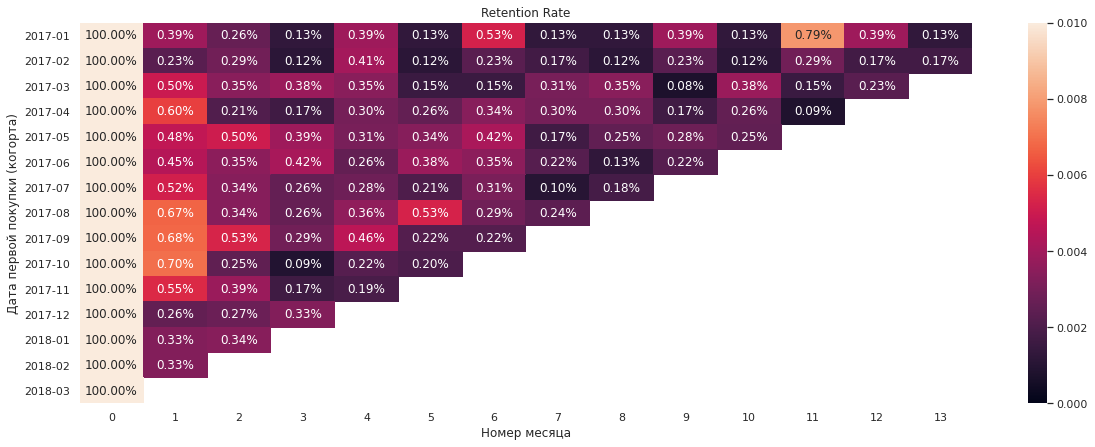

In [65]:
#добавляем цвет.
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

sns.heatmap(retention, mask=retention.isnull(), annot=True, fmt='.2%', vmin=0.0, vmax=0.01)
plt.title('Retention Rate')
plt.ylabel('Дата первой покупки (когорта)')
plt.xlabel('Номер месяца')

Ответ: когорта с самым высоким retention на 3-й месяц (включая первый) совершила первую покупку в сентябре 2017-го.

# 6.  Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
    В кластеризации можешь выбрать следующие метрики: 
        R - время от последней покупки пользователя до текущей даты, 
        F - суммарное количество покупок у пользователя за всё время, 
        M - сумма покупок за всё время. 
    Подробно опиши, как ты создавал кластеры. 
    Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [6]:
#объединяем все датафрэймы в один.
rfm = orders.merge(customers, on='customer_id').merge(order_items, on='order_id')

In [32]:
#оставляем только те заказы, которые считаем покупкой
rfm = rfm.query('order_approved_at != "NaT" and order_status != "canceled"')
rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [33]:
#создаём условное сегодня, относительно которого будем считать Recency. 
#для этого к дате последней оплаты добавлением один день.
today = rfm["order_approved_at"].max() + pd.Timedelta(days=1)
today

Timestamp('2018-09-04 17:40:06')

In [34]:
rfm.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

In [35]:
#создаём df с последней покупкой, количеством заказов и суммой оплат для каждого клиента.
#переименовывем полученные колонки, вычитаем дату каждой последней покупки из "сегодня".
rfm = rfm \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'max', 'order_id': 'count', 'price': 'sum'}) \
    .rename(columns={'order_approved_at': 'recency', 'order_id': 'frequency', 'price': 'monetary'})

rfm['recency'] = ((today - rfm.recency).dt.days).astype('Int64')
rfm.dtypes

customer_unique_id     object
recency                 Int64
frequency               int64
monetary              float64
dtype: object

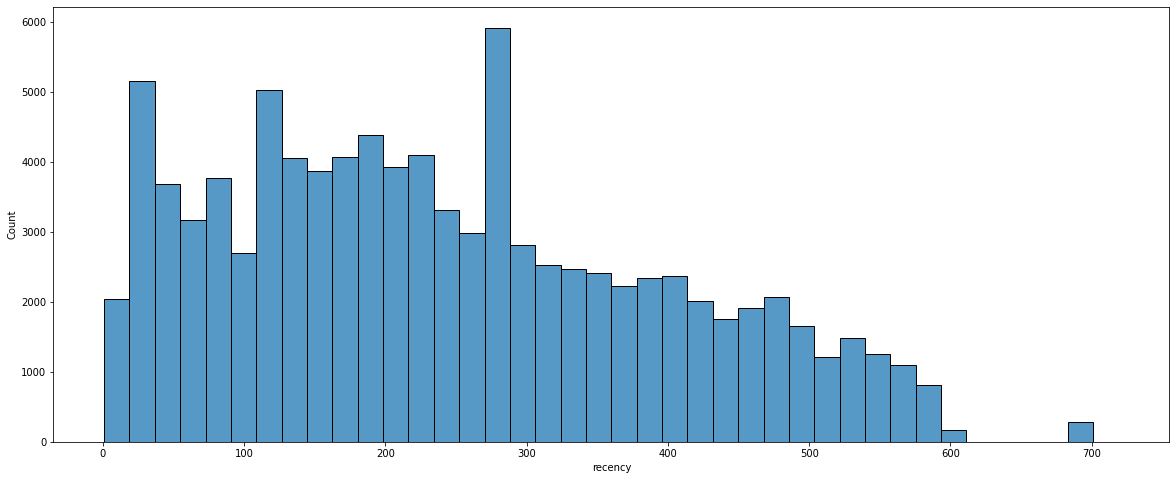

In [11]:
#смотрим на распределение данных 'recency', не идеально нормальное, но для сегментации подойдёт.
plt.figure (figsize=(20,8))
sns.histplot(rfm, x='recency', bins=40)

In [36]:
#определяем границы разбивки 'recency' на три части.
quantiles = rfm['recency'].quantile([0.33, 0.66]).to_dict()
quantiles

{0.33: 153.0, 0.66: 292.0}

In [37]:
#создаём функцию для сегментации, чем меньше 'recency', тем выше сегмент
def r_score(x):
    if x <= quantiles[0.33]:
        return 3
    elif x <= quantiles[0.66]:
        return 2
    else:
        return 1

,customer_unique_id,recency,frequency,monetary,R
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1


In [25]:
#применяем функцию к колонке
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm.head()

,customer_unique_id,recency,frequency,monetary,R
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2


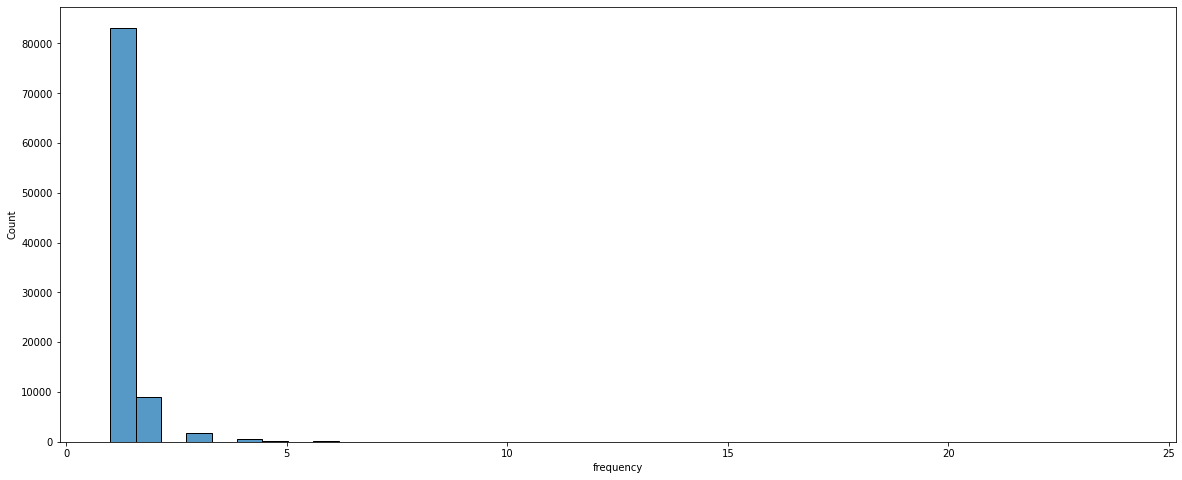

In [27]:
#смотрим на распределение данных 'frequency', видим, что оно очень неравномерное.
plt.figure (figsize=(20,8))
sns.histplot(rfm, x='frequency', bins=40)

In [28]:
#подавляющее большинство совершили одну покупку.
rfm.frequency.value_counts()

1     83173
2      8949
3      1667
4       629
5       246
6       195
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: frequency, dtype: int64

In [38]:
#создаём функцию для сегментации.
#три сегмента будут следующими: 1 покупка, 2 покупки, 3 и более покупок.
#чем больше количество покупок, тем выше сегмент.
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

,customer_unique_id,recency,frequency,monetary,R,F
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1


In [32]:
#применяем функцию к колонке.
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1


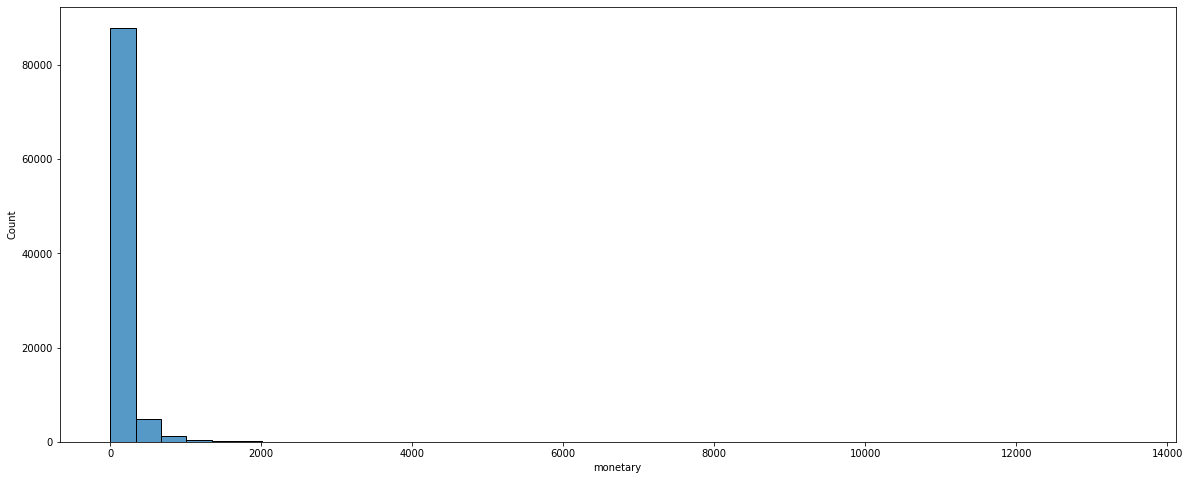

In [64]:
#смотрим на распределение данных 'monetary', видим, что оно также очень неравномерное.
plt.figure (figsize=(20,8))
sns.histplot(rfm, x='monetary', bins=40)

In [33]:
rfm.monetary.value_counts()

59.90      1603
69.90      1493
49.90      1335
89.90      1153
99.90      1128
           ... 
298.99        1
114.39        1
1169.00       1
69.84         1
768.00        1
Name: monetary, Length: 8569, dtype: int64

In [39]:
#создаём границы сегментов.
#так как у подавляющего большинства сумма покупок небольшая, то для каждой границы берём значения до 80 перцентиля,
#затем отсекаем данные (больше 80 перцентиля) и снова берём значения до 80 перцентиля.
m_q8_1 = rfm.monetary.quantile(0.8)
m_q8_2 = rfm.loc[rfm.monetary > m_q8_1].monetary.quantile(0.8)
print(f'{m_q8_1}\n{m_q8_2}')

179.9
499.99


In [40]:
#создаём функцию для сегментации.
#чем больше сумма, тем выше сегмент.
def m_score(x):
    if x < m_q8_1:
        return 1
    elif x >= m_q8_1 and x < m_q8_2:
        return 2
    else:
        return 3

In [36]:
#применяем функцию к колонке.
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [43]:
#добавляем колонку "rfm_score" на основании полученных r, f, m оценок.
rfm['RFM_score'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

In [44]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,1,311
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,2,112


In [26]:
rfm.RFM_score.nunique()

27

Получилось 27 уникальных сегментов

Уходящие

111 - Потерянные экономные.  
112-113 - Одноразовые.       
121-122-123 - Уходящие редкие.                 
131 - Постоянные.                  
132 - Хорошие постоянные.                  
133 - VIP.            

Спящие

211-212-213 - Разовые с маленьким чеком.            
221 - Редкие с маленьким чеком.              
222 - Редкие со средним чеком.             
223 - Редкие с высоким чеком.          
231 - Постоянные с маленьким чеком.            
222 - Постоянные со средним чеком.              
223 - Постоянные с высоким чеком.          

Постоянные

311 - Новички с маленьким чеком.            
312 - Новички со средним чеком.            
313 - Новички с высоким чеком.              
321 - Постоянные с маленьким чеком.            
322 - Постоянные со средним чеком.            
323 - Постоянные с высоким чеком.          
331 - Постоянные с маленьким чеком.                
332 - Постоянные со средним чеком.          
333 - VIP.          